<a href="https://colab.research.google.com/github/mungaimoureen/Online-gift-Retail/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understanding the context
Online retail is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The retail store is looking for ways to segment customers so as to be able to target customers efficiently.

# 2. Main Objective

We aim to segement the Customers based on Recency, Frequency and Monetary so that the company can target its customers efficiently.

Recency — How recently did the customer purchase? It means the number of days since a customer made the last purchase.

Frequency — How often do they purchase in a given period. The bigger the value is, the more engaged the customers are.

Monetary — How much do a customer spend? It is the total amount of money a customer spent in a given period.

# 3. Specific Objective

 a. To find out from which country do most orders are made.

 b. To use different cluster types to segment customers.

 c. To compare different cluster type and their perfomance

 # 4. Analysis Process 
 Step 1: Reading and Understanding the Data

 Step 2: Data Cleansing

 Step 3: Data Preparation

 Step 4: Model Building

 Step 5: Final Analysis

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
#install packages
install.packages('dendextend')
install.packages('clValid')
install.packages('cluster')
install.packages('tidyr')
install.packages('fpc')
install.packages('gridExtra')
install.packages('factoextra')
install.packages('lubridate')
install.packages('dplyr')
install.packages('grid')
install.packages('tidyverse')
install.packages('ggplot2')
install.packages('DT')

install.packages("remotes")
remotes::install_github("Displayr/flipTime")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘gridExtra’, ‘viridis’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1062844 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                           
2: CRAN packages only            
3: None                          
4: pillar (1.7.0 -> 1.8.0) [CRAN]
5: tibble (3.1.7 -> 3.1.8) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 1
pillar (1.7.0 -> 1.8.0 ) [CRAN]
tibble (3.1.7 -> 3.1.8 ) [CRAN]
plotly (NA    -> 4.10.0) [CRAN]


R[write to console]: Installing 3 packages: pillar, tibble, plotly

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pillar_1.8.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 479921 bytes (468 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

* checking for file ‘/tmp/RtmpVx4s8b/remotes3b43b4daab/Displayr-flipTime-14f9ef9/DESCRIPTION’ ... OK
* preparing ‘flipTime’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘flipTime/tools’
Omitted ‘LazyData’ from DESCRIPTION
* building ‘flipTime_2.9.5.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
%%R
#Load libraries
library(rmarkdown)
library(DT)
library(ggplot2)
library(tidyverse)
library(grid)
library(knitr)
library(dplyr)
library(lubridate)
library(factoextra)
library(gridExtra)
library(fpc)
library(tidyr)
library(cluster)
library(clValid)
library(dendextend)



R[write to console]: Need help getting started? Try the R Graphics Cookbook:
https://r-graphics.org



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

R[write to console]: 
Attaching package: ‘gridExtra’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine


R[write to console]: 
---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend

# 1. Understanding The Data

In [ ]:
%%R
#load and Preview the Online Retail Dataset
retail_df<-read.csv('OnlineRetailUK.csv')

In [ ]:
%%R
#Preview top 10 entries from the dataset
head(retail_df, 10)

   InvoiceNo StockCode                         Description Quantity
1     536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER        6
2     536365     71053                 WHITE METAL LANTERN        6
3     536365    84406B      CREAM CUPID HEARTS COAT HANGER        8
4     536365    84029G KNITTED UNION FLAG HOT WATER BOTTLE        6
5     536365    84029E      RED WOOLLY HOTTIE WHITE HEART.        6
6     536365     22752        SET 7 BABUSHKA NESTING BOXES        2
7     536365     21730   GLASS STAR FROSTED T-LIGHT HOLDER        6
8     536366     22633              HAND WARMER UNION JACK        6
9     536366     22632           HAND WARMER RED POLKA DOT        6
10    536367     84879       ASSORTED COLOUR BIRD ORNAMENT       32
      InvoiceDate UnitPrice CustomerID        Country
1  12/1/2010 8:26      2.55      17850 United Kingdom
2  12/1/2010 8:26      3.39      17850 United Kingdom
3  12/1/2010 8:26      2.75      17850 United Kingdom
4  12/1/2010 8:26      3.39      178

In [ ]:
%%R
#preview last 10 entries
tail(retail_df, 10)

       InvoiceNo StockCode                     Description Quantity
541900    581587     22726      ALARM CLOCK BAKELIKE GREEN        4
541901    581587     22730      ALARM CLOCK BAKELIKE IVORY        4
541902    581587     22367 CHILDRENS APRON SPACEBOY DESIGN        8
541903    581587     22629             SPACEBOY LUNCH BOX        12
541904    581587     23256     CHILDRENS CUTLERY SPACEBOY         4
541905    581587     22613     PACK OF 20 SPACEBOY NAPKINS       12
541906    581587     22899    CHILDREN'S APRON DOLLY GIRL         6
541907    581587     23254   CHILDRENS CUTLERY DOLLY GIRL         4
541908    581587     23255 CHILDRENS CUTLERY CIRCUS PARADE        4
541909    581587     22138   BAKING SET 9 PIECE RETROSPOT         3
           InvoiceDate UnitPrice CustomerID Country
541900 12/9/2011 12:50      3.75      12680  France
541901 12/9/2011 12:50      3.75      12680  France
541902 12/9/2011 12:50      1.95      12680  France
541903 12/9/2011 12:50      1.95      12680 

In [ ]:
%%R
#check the retail_df dimension
dim(retail_df)

#the dataset has 541909 rows and 8 columns

[1] 541909      8


In [ ]:
%%R
#check the dataset structure
str(retail_df)

#the dataset variables have various data types:
#1. InvoiceNo, StockCode, Description, InvoiceDate and Country are of factor type
#2. Quantity and CustomerID are of Integer Type
#3. lastly, UnitPrice is of Number.

'data.frame':	541909 obs. of  8 variables:
 $ InvoiceNo  : chr  "536365" "536365" "536365" "536365" ...
 $ StockCode  : chr  "85123A" "71053" "84406B" "84029G" ...
 $ Description: chr  "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : int  6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: chr  "12/1/2010 8:26" "12/1/2010 8:26" "12/1/2010 8:26" "12/1/2010 8:26" ...
 $ UnitPrice  : num  2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : int  17850 17850 17850 17850 17850 17850 17850 17850 17850 13047 ...
 $ Country    : chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


# 2. Data Cleaning and Preparation

In [ ]:
%%R
#checking for missing and null values
colSums(is.na(retail_df))

#there are 135080(CustomerID) missing values from the dataset in the CustomerID column. 
#However, we wont drop the column as its part of our main unit for analysis therefor we'll only drop rows wit missing values.

  InvoiceNo   StockCode Description    Quantity InvoiceDate   UnitPrice 
          0           0           0           0           0           0 
 CustomerID     Country 
     135080           0 


In [ ]:
%%R
#check for null entries in the dataset
any(is.null(retail_df))

#there are no null values

[1] FALSE


In [ ]:
%%R
#removing missing values
retail_df = na.omit(retail_df)
dim(retail_df)

#After removing the missing values, we have 406829 observations in the dataset.

[1] 406829      8


In [ ]:
%%R
#Duplicate Values

dim(unique(retail_df))[1]

#We have 401604 unique values because we have duplicated values in invoiceNo and customerID and we need to retain the duplicates

[1] 401604


In [ ]:
%%R
# CANCELLATIONS
# if the InvoiceNo starts with letter 'C', it indicates a cancellation
retail_df %>% 
  filter(grepl("C", retail_df$InvoiceNo)) %>% 
  summarise(Total = n())

#there are 8905 cancellations


  Total
1  8905


In [ ]:
%%R
# Cancellations are not needed for the analysis so they can be removed
retail_df <- retail_df %>% 
  filter(!grepl("C", retail_df$InvoiceNo)) 

In [ ]:
%%R
# NEGATIVE QUANTITIES
# remove all rows with non-positive _Quantity_. 
retail_df  <- retail_df %>%
  filter(Quantity > 0)

In [ ]:
%%R
# there are NAs in _Description_. 
sum(is.na(retail_df$Description))

[1] 0


## 2.1 Data Preparation

In [ ]:
%%R
#In order to perform analysis, we split the InvoiceDate into Day, Month, Year and Hour. 
#Hence, we first convert ed it to character and split the InvoiceDate records into weekOfDay, hourOfDay, month and year.

retail_df$InvoiceDate <- as.character(retail_df$InvoiceDate)
 

In [ ]:
%%R
# separate date and time components of invoice date
retail_df$date <- sapply(retail_df$InvoiceDate, FUN = function(x) {strsplit(x, split = '[ ]')[[1]][1]})
retail_df$time <- sapply(retail_df$InvoiceDate, FUN = function(x) {strsplit(x, split = '[ ]')[[1]][2]})

In [ ]:
%%R
# create month, year and hour of day variables
retail_df$month <- sapply(retail_df$date, FUN = function(x) {strsplit(x, split = '[-]')[[1]][2]})
retail_df$year <- sapply(retail_df$date, FUN = function(x) {strsplit(x, split = '[-]')[[1]][3]})
retail_df$hourOfDay <- sapply(retail_df$time, FUN = function(x) {strsplit(x, split = '[:]')[[1]][1]})

In [ ]:
%%R
#Install additional Packages and load
require(devtools)
install_github("Displayr/flipTime", force = TRUE) 
library(flipTime)

R[write to console]: Loading required package: devtools

R[write to console]: Loading required package: usethis

R[write to console]: Downloading GitHub repo Displayr/flipTime@HEAD



* checking for file ‘/tmp/RtmpVx4s8b/remotes3b6ec15458/Displayr-flipTime-14f9ef9/DESCRIPTION’ ... OK
* preparing ‘flipTime’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘flipTime/tools’
Omitted ‘LazyData’ from DESCRIPTION
* building ‘flipTime_2.9.5.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
%%R
#convert the date variables to the appopriate class so as to create a column of TotalSales and dayOfWeek.

retail_df$InvoiceDate <- AsDateTime(retail_df$InvoiceDate)


In [ ]:
%%R
#create Total sales column
retail_df = mutate(retail_df, TotalSales = Quantity*UnitPrice)


In [ ]:
%%R
#Identify day of week
retail_df$dayOfWeek <- lubridate::wday(retail_df$InvoiceDate,label = TRUE)

In [ ]:
%%R
#turn the appropriate variables into factors
retail_df$Country <- as.factor(retail_df$Country)
retail_df$month <- as.factor(retail_df$month)
retail_df$year <- as.factor(retail_df$year)
levels(retail_df$year) <- c(2010,2011)
hourOfDay <- as.factor(retail_df$hourOfDay)
retail_df$dayOfWeek <- as.factor(retail_df$dayOfWeek)

In [ ]:
%%R
#preview the new dataset
head(retail_df, 5)


  InvoiceNo StockCode                         Description Quantity
1    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER        6
2    536365     71053                 WHITE METAL LANTERN        6
3    536365    84406B      CREAM CUPID HEARTS COAT HANGER        8
4    536365    84029G KNITTED UNION FLAG HOT WATER BOTTLE        6
5    536365    84029E      RED WOOLLY HOTTIE WHITE HEART.        6
          InvoiceDate UnitPrice CustomerID        Country      date time month
1 2010-12-01 08:26:00      2.55      17850 United Kingdom 12/1/2010 8:26  <NA>
2 2010-12-01 08:26:00      3.39      17850 United Kingdom 12/1/2010 8:26  <NA>
3 2010-12-01 08:26:00      2.75      17850 United Kingdom 12/1/2010 8:26  <NA>
4 2010-12-01 08:26:00      3.39      17850 United Kingdom 12/1/2010 8:26  <NA>
5 2010-12-01 08:26:00      3.39      17850 United Kingdom 12/1/2010 8:26  <NA>
  year hourOfDay TotalSales dayOfWeek
1 <NA>         8      15.30       Wed
2 <NA>         8      20.34       Wed
3 <NA>    

To implement the RFM analysis, we further processed the data set by the following steps:

1. identify the most recent date for each ID , to get the Recency data
2. Calculated the quantity of transactions of a customer till present date, to get the Frequency data
3. lastly, sum of Total Sales is the Monetary data.

In [ ]:
%%R
#Calculating Recency, Frequency and Monetary
max_date <- max(retail_df$InvoiceDate, na.rm = TRUE)
retail_df = mutate(retail_df, Diff = difftime(max_date, InvoiceDate, units = "days"))
retail_df$Diff <- floor(retail_df$Diff)

In [ ]:
%%R
#creating an RFM table for our analysis
RFM <- summarise(group_by(retail_df,CustomerID),Frequency = n(), Monetary = sum(TotalSales), Recency = min(Diff))
RFM$Recency <- as.numeric(RFM$Recency)
RFM$Monetary[is.na(RFM$Monetary)] <- 0


In [ ]:
%%R
#preview the new dataset
head(RFM,10)

# A tibble: 10 × 4
   CustomerID Frequency Monetary Recency
        <int>     <int>    <dbl>   <dbl>
 1      12346         1   77184.     325
 2      12347       182    4310        1
 3      12348        31    1797.      74
 4      12349        73    1758.      18
 5      12350        17     334.     309
 6      12352        85    2506.      35
 7      12353         4      89      203
 8      12354        58    1079.     231
 9      12355        13     459.     213
10      12356        59    2811.      22


# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

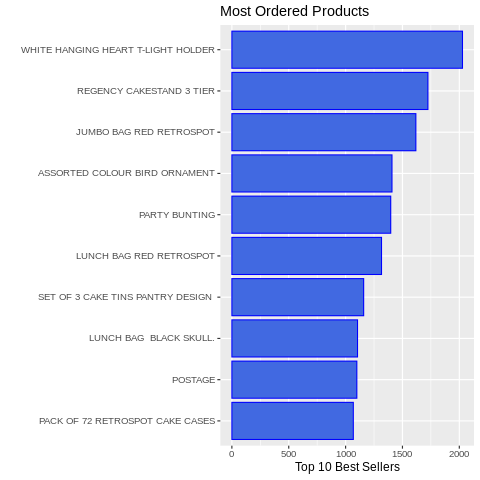

In [ ]:
%%R
# Top 10 most sold products sold by the online retail store
retail_df %>% 
  group_by(Description) %>% 
  summarize(count = n()) %>% 
  top_n(10, wt = count) %>%
  arrange(desc(count)) %>% 
  ggplot(aes(x = reorder(Description, count), y = count))+
  geom_bar(stat = "identity", fill = "royalblue", colour = "blue") +
  labs(x = "", y = "Top 10 Best Sellers", title = "Most Ordered Products") +
  coord_flip() +
  theme_grey(base_size = 12)

The White hanging heart t-light holder is the most popular item orederd.

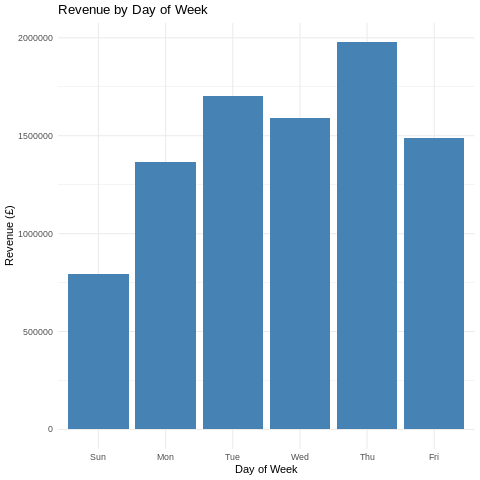

In [ ]:
%%R
#Day of the week people tend to order a lot hence more revenue
ggplot(summarise(group_by(retail_df, dayOfWeek), revenue = sum(TotalSales)), aes(x = dayOfWeek, y = revenue)) + geom_bar(stat = 'identity', fill = 'Steel Blue') + labs(x = 'Day of Week', y = 'Revenue (£)', title = 'Revenue by Day of Week') + 
  theme_minimal()

Tuesday and Thursday are the days where more revenue were generated in comparison to other weekdays. 

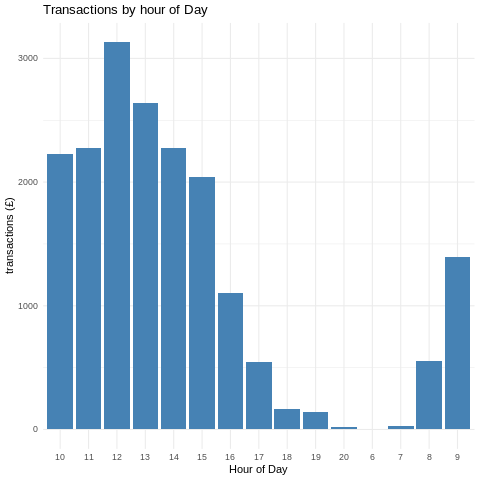

In [ ]:
%%R
#Transactions By hour of the Day Analysis

ggplot(summarise(group_by(retail_df, hourOfDay), transactions = n_distinct(InvoiceNo)), aes(x = hourOfDay, y = transactions)) + geom_bar(stat = 'identity', fill = "Steel Blue") + labs(x = 'Hour of Day', y = 'transactions (£)', title = 'Transactions by hour of Day') + 
  theme_minimal()


The graph shows that between 10am till 3pm most of the orders are placed online.

In [ ]:
%%R
#Transactions By Country

Transactions_by_Country <- top_n(arrange(summarise(group_by(retail_df, Country), 'Number of Transcations' = n()), desc(`Number of Transcations`)), 10)


Selecting by Number of Transcations


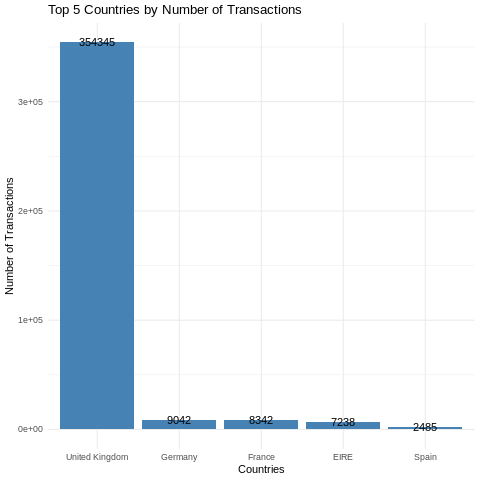

In [ ]:
%%R
# Selecting by Number of Transcations
names(Transactions_by_Country) <- c("Country", "Number of Transactions")

Transaction_by_Country_plot <- ggplot(head(Transactions_by_Country,5), aes(x = reorder(Country,-`Number of Transactions`), y = `Number of Transactions`)) + geom_bar(stat = 'identity', fill = "Steel Blue") +
  geom_text(aes(label = `Number of Transactions`)) +
  ggtitle('Top 5 Countries by Number of Transactions') + xlab('Countries') +
  ylab('Number of Transactions') +
  theme_minimal() 
print(Transaction_by_Country_plot)

UK has the major portion of the customers with respect to other countries

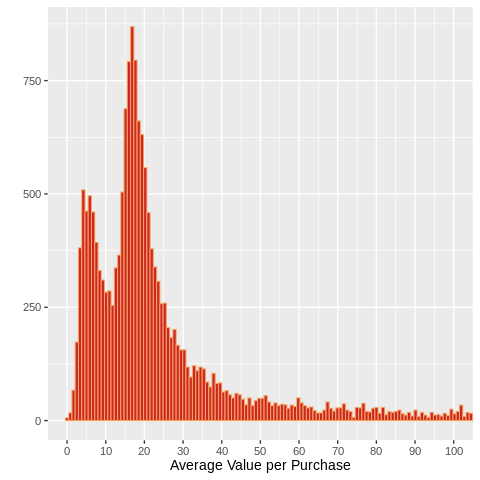

In [ ]:
%%R
# the average value per order
retail_df %>% 
  mutate(Value = UnitPrice * Quantity) %>% 
  group_by(InvoiceNo) %>% 
  summarise(n = mean(Value)) %>%
  ggplot(aes(x=n)) +
  geom_histogram(bins = 200000, fill="firebrick3", colour = "sandybrown") + 
  coord_cartesian(xlim=c(0,100)) +
  scale_x_continuous(breaks=seq(0,100,10)) +
  labs(x = "Average Value per Purchase", y = "") + 
  theme_grey(base_size = 14)

The bulk of orders have a value below £20

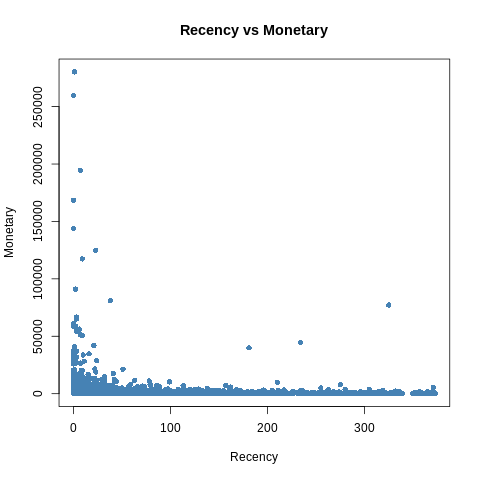

In [ ]:
%%R
# Recency vs Monetary
plot(RFM$Recency, RFM$Monetary, pch=16, col='steelblue',
     main='Recency vs Monetary',
     xlab='Recency', ylab='Monetary')

no positive correlation between Recency and Monetary

In [ ]:
%%R
#Install correlation package
install.packages('corrplot')
library(corrplot)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpVx4s8b/downloaded_packages’




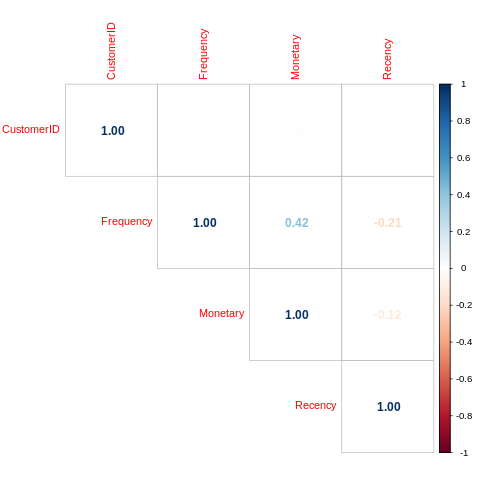

In [ ]:
%%R
#correlation plot for the RFM table
corrplot(cor(RFM), type = 'upper', method = 'number', tl.cex = 0.9)


There' a weak correlation between the Frequency and Monetary. we can fit a linear euation showing the relation.

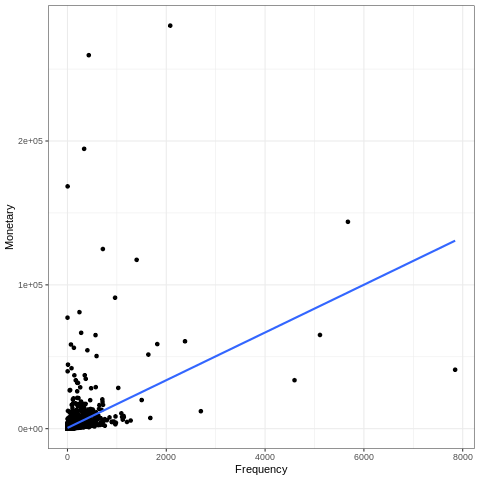

In [ ]:
%%R
# Relationship between  Frequency and Monetary.
ggplot(RFM, aes(x = Frequency, y = Monetary)) +
  geom_point() +
  geom_smooth(method = 'lm', se = FALSE) +
  theme_bw()

Again from the plot, you can tell there's a weak correlation between the two.

# 4 Modelling

## 4.1 K-Means Clustering

In [ ]:
%%R
#Sacling the data
RFM <- data.frame(RFM)
row.names(RFM) <- RFM$CustomerID
RFM <- RFM[,-1]
RFM_scaled <- scale(RFM) 
RFM_scaled <- data.frame(RFM_scaled)

In [ ]:
#Determining Optimal Cluster
#We used two most popular methods to find an optimal number of clusters:

# 1. Elbow Method
# 2. Silhouette Method

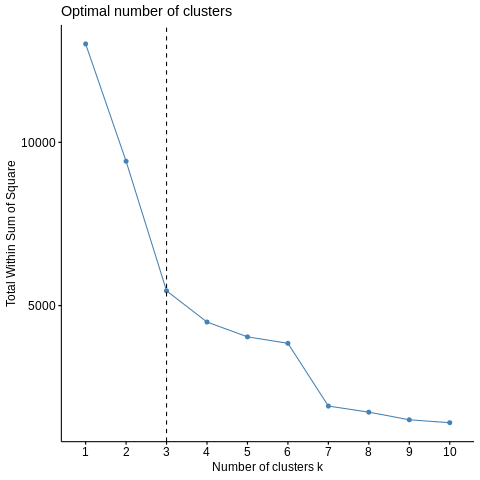

In [ ]:
%%R
# . Elbow method
fviz_nbclust(RFM_scaled, kmeans, method = "wss") + geom_vline(xintercept = 3, linetype = 2)

from the graph, cluster 3 is where the curve starts to bend, so we picked k=3 as the optimal cluster.

## 4.2 2. Average Silhoute Method

the average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k Square.

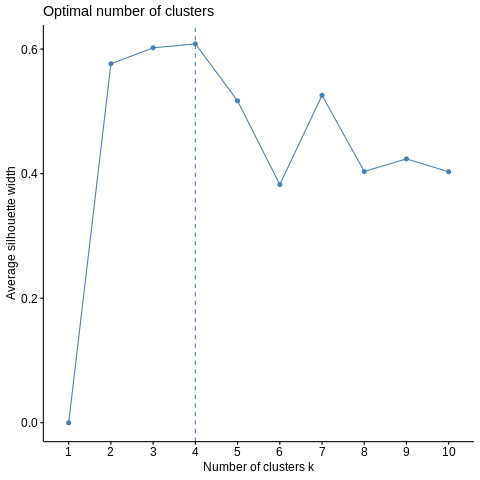

In [ ]:
%%R
fviz_nbclust(RFM_scaled, kmeans, method = "silhouette") 


From the graph k=4 is the Optimal number of Cluster and k=3 is the next best.



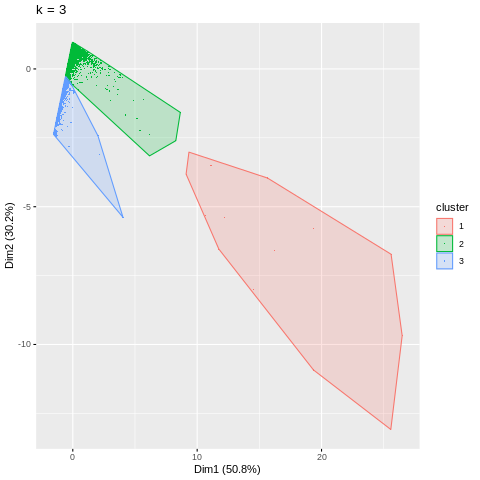

In [ ]:
%%R
#visualize kmeans clusters using both k=3 and k=4 for better understanding.
k3 <- kmeans(RFM_scaled, centers = 3, nstart = 25)
k4 <- kmeans(RFM_scaled, centers = 4, nstart = 25)

fviz_cluster(k3, geom = "point", data = RFM_scaled, pointsize = 0.2) + ggtitle("k = 3")

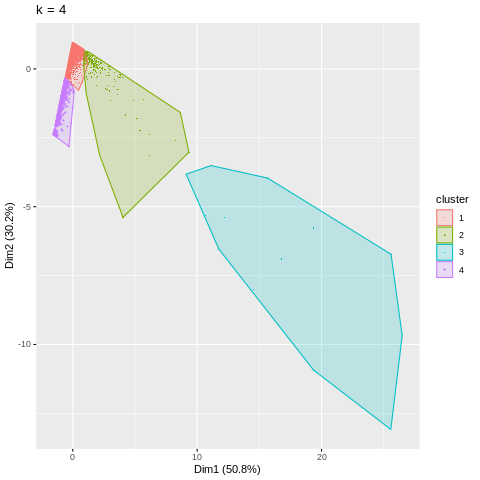

In [ ]:
%%R
fviz_cluster(k4, geom = "point", data = RFM_scaled, pointsize = 0.2) + ggtitle("k = 4")

We noted that there are some overlapping of clusters for k=4, hence we confirm that k=3 is the best and optimal k.

In [ ]:
%%R
#After Comparing the algorithms we decided that K=3 is the optimal Cluster.
#summary statistics of each cluster for each of the variables.

res <- cbind(RFM, ClusterId = k3$cluster)
res <- as.data.frame(res)

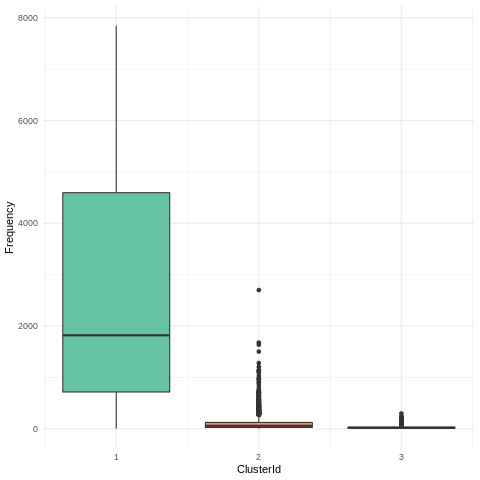

In [ ]:
%%R
#Visualize the Frequency K-means clutering
ggplot(res, aes(x = ClusterId, y = Frequency, group = ClusterId, fill = as.factor(ClusterId))) + 
  geom_boxplot(show.legend = FALSE) + theme_minimal() + scale_fill_brewer(palette = "Set2") 

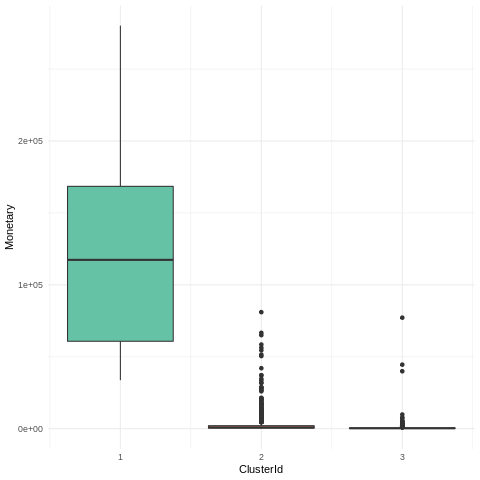

In [ ]:
%%R
#Visualize the Moenatry K-means clutering
ggplot(res, aes(x = ClusterId, y = Monetary, group = ClusterId, fill = as.factor(ClusterId))) + 
  geom_boxplot(show.legend = FALSE) + theme_minimal() + scale_fill_brewer(palette = "Set2")

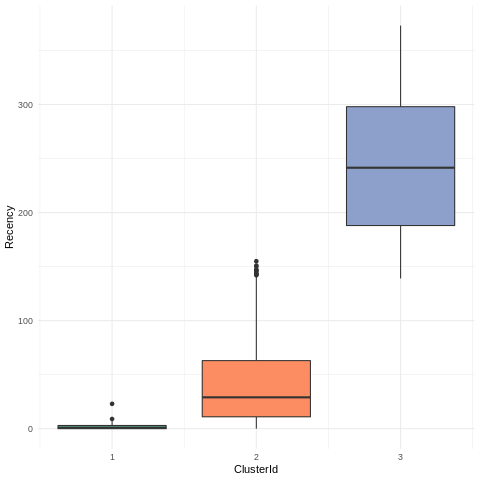

In [ ]:
%%R
##Visualize the Recency K-means clutering
ggplot(res, aes(x = ClusterId, y = Recency, group = ClusterId, fill = as.factor(ClusterId))) + 
  geom_boxplot(show.legend = FALSE) + theme_minimal() + scale_fill_brewer(palette = "Set2")

## 4.2 Hierachical Clustering

Hierarchical clustering is an alternative approach to k-means clustering for identifying groups in the dataset. It does not require one to pre-specify the number of clusters to be generated as is required by the k-means approach.

Furthermore, hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations; the dendrogram.

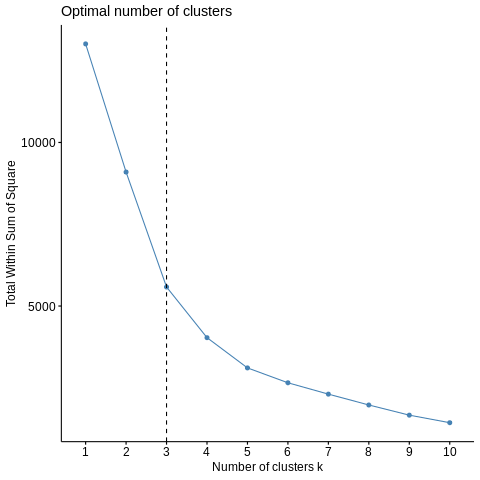

In [ ]:
%%R
#Determining Optimal Cluster
# 1. Elbow Method
fviz_nbclust(RFM_scaled, FUN = hcut, method = "wss") + geom_vline(xintercept = 3, linetype = 2)

The optimal cluster is k=3

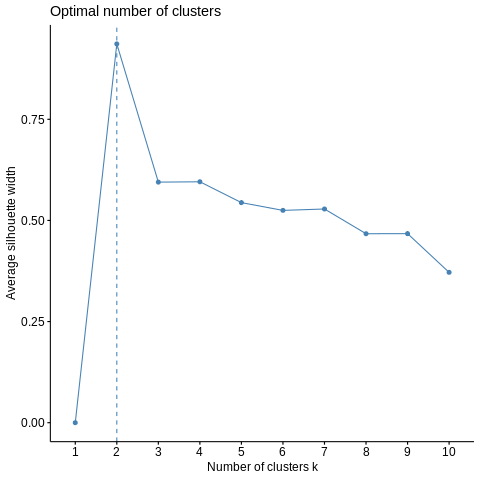

In [ ]:
%%R
#2. Average Silhouette Method

fviz_nbclust(RFM_scaled, FUN = hcut, method = "silhouette")

Here, we note that k=2 is the Optimal number of Cluster and k=3 is the next best

In [ ]:
%%R
#Hierarchical Clustering

#We perform agglomerative HC with hclust. To begin we computed the dissimilarity values with dist and then fed the values into hclust and specify the agglomeration method to be used.

In [ ]:
%%R
euclidian_dist <- dist(RFM_scaled, method = "euclidean")

In [ ]:
%%R
# Hierarchical clustering using Complete Linkage
hc1 <- hclust(euclidian_dist, method = "single" )

hc2 <- hclust(euclidian_dist, method = "complete" )

hc3 <- hclust(euclidian_dist, method = "ward.D2" )

hc4 <- hclust(euclidian_dist, method = "average" )

m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

In [ ]:
%%R
# function to compute coefficient
ac <- function(x) {
  agnes(RFM_scaled, method = x)$ac
}

map_dbl(m, ac)

  average    single  complete      ward 
0.9976879 0.9955588 0.9984538 0.9992902 


The agnes$ac value gets the agglomerative coefficient, which measures the amount of clustering structure found (values closer to 1 suggest strong clustering structure). 

We note that all the four linkage methods are quite similar and close to 1, but Ward’s method gives the best result.


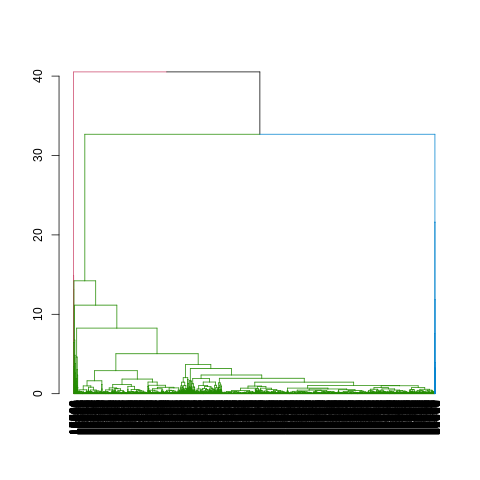

In [ ]:
%%R
#visualize complete(h2) dendrogram

hc2 <- as.dendrogram(hc2)
cd = color_branches(hc2,k = 3)
plot(cd)

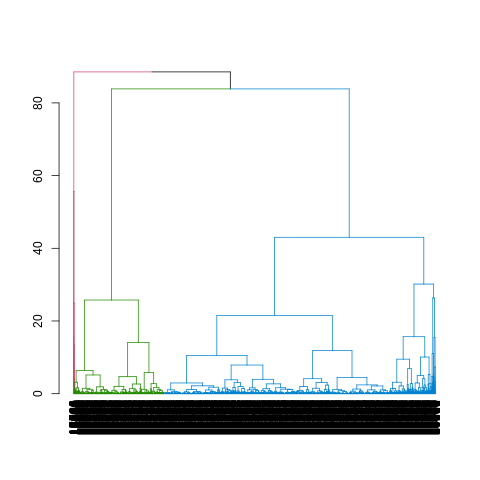

In [ ]:
%%R
#visualize ward(h3) dendrogram
hc3 <- as.dendrogram(hc3)
cd = color_branches(hc3,k = 3)
plot(cd)

We observed that the Complete linkage creates clusters for each outliers and thus creates 2 clusters each for 2 outlier which would not provide good result. therefore proceeded to with Ward’s method.

In [ ]:
%%R
#Summar Statistic
ward.clust = cutree(hc3,k = 3)
res1 <- cbind(RFM, ClusterId = ward.clust)
res1 <- as.data.frame(res1)

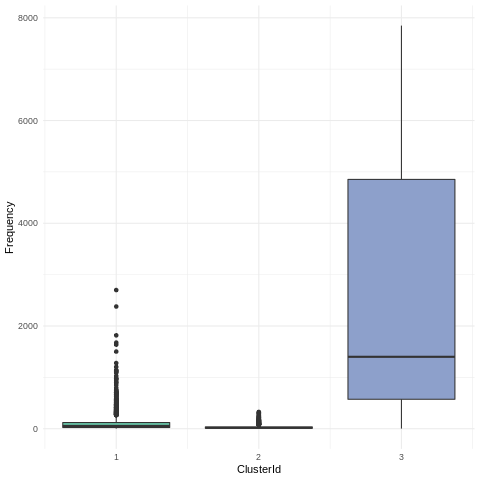

In [ ]:
%%R
#Visualization for the Frequency clusters
ggplot(res1, aes(x = ClusterId, y = Frequency, group = ClusterId, fill = as.factor(ClusterId))) + 
  geom_boxplot(show.legend = FALSE) + theme_minimal() + scale_fill_brewer(palette = "Set2")  

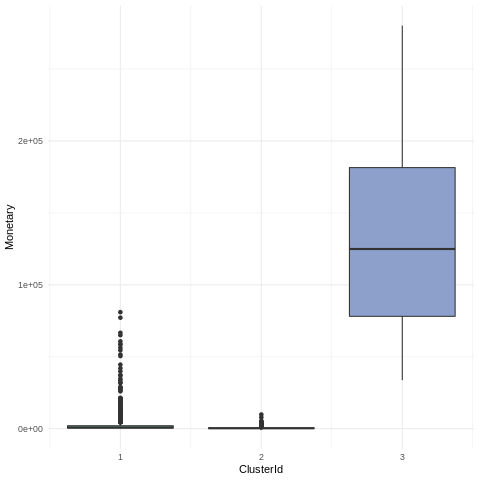

In [ ]:
%%R
#Visualization for the Monetry clusters
ggplot(res1, aes(x = ClusterId, y = Monetary, group = ClusterId, fill = as.factor(ClusterId))) + 
  geom_boxplot(show.legend = FALSE) + theme_minimal() + scale_fill_brewer(palette = "Set2")

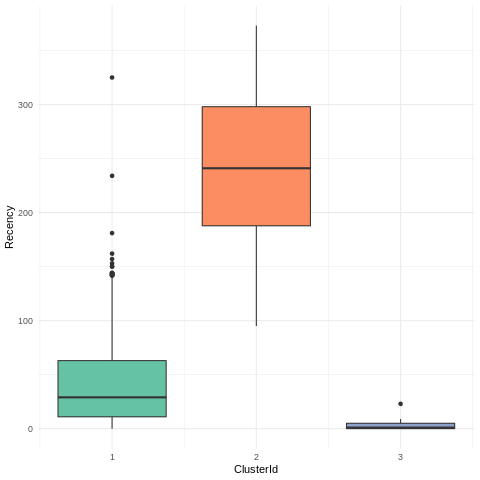

In [ ]:
%%R
#Visualization for the Recency clusters
ggplot(res1, aes(x = ClusterId, y = Recency, group = ClusterId, fill = as.factor(ClusterId))) + 
  geom_boxplot(show.legend = FALSE) + theme_minimal() + scale_fill_brewer(palette = "Set2")

# 5. Conclusion

Although both the methods did not give too good results, but k-means Clustering provided better results for this dataset.

In [ ]:
%%R
#K-means Clustering results
aggregate(res,by = list(res$ClusterId),FUN = mean)

  Group.1  Frequency    Monetary    Recency ClusterId
1       1 2566.00000 126118.3100   3.692308         1
2       2  103.06624   2028.2088  40.368762         2
3       3   27.78981    637.3185 246.308333         3


K-Means Clustering with 3 Clusters:

1. Customers in Cluster 1 are the customers with high amount of 
transactions, are frequent buyers, and recent buyers as compared to other customers, hence most important from business point of view.

2. Customers in Cluster 2 are the customers with average amount of transactions as compared to other customers.

3. Customers in Cluster 3 are the customers with least amount of transactions, are infrequent buyers, and not recent buyers and hence least of importance from business point of view.

In [ ]:
%%R
#Hierarchical clustering results
aggregate(res1,by = list(res1$ClusterId),FUN = mean)

  Group.1  Frequency    Monetary    Recency ClusterId
1       1  103.14871   2105.2382  40.555419         1
2       2   31.23704    512.6388 245.674074         2
3       3 2651.00000 138176.7545   4.181818         3


Hierarchical Clustering with 3 Clusters

1. Customers in Cluster 1 are the customers with average amount of transactions as compared to other customers.

2. Customers in Cluster 2 are the customers with least amount of transactions, are infrequent buyers, and not recent buyers and hence least of importance from business point of view.

3. Customers in Cluster 3 are the customers with high amount of transactions, are frequent buyers, and recent buyers as compared to other customers, hence most important from business point of view.

# 6. Recommendation

1. More clients order from the UK, as such most of the items sold should be tailored to meet the UK clientbase. Also, Increase the number of staff if needed to overcome the high number of UK customers.

2. Increase the stock of products with the most sales in this case the White Hanging Heart T-Light Holder

3. Increase the number of staff who shift on Thursday.

4. Employ marketing tactics to to market items in countries with least orders from and also market less orderd items.

